In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 시본(seaborn) : 맷플롯립을 바탕으로 다양한 함수 사용을 돕는 일종의 래퍼(wrapper) 모듈
# 맷플롯립과 동일한 결과물이 나오며, 작성 과정이 간단
# 그림 객체나 축 객체 같은 복잡한 개념이 없음
# xticks 설정하지 않아도 각 축에 라벨 자동으로 생성
# 데이터프레임과 x, y에 해당하는 열 이름만 지정하면 됨

<Axes: xlabel='timepoint', ylabel='signal'>

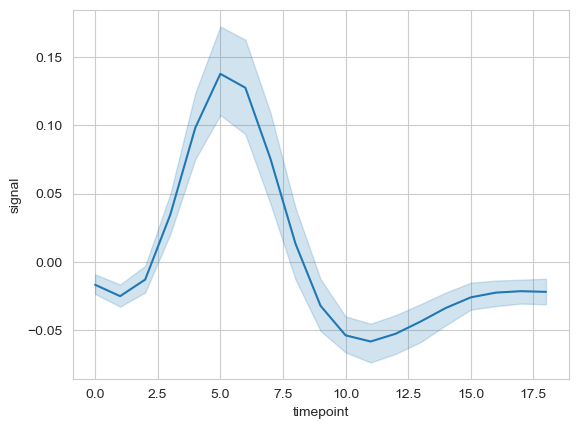

In [8]:
fmri = sns.load_dataset("fmri") #(2)fmri 데이터셋 사용
sns.set_style("whitegrid")      # (3) 기본 스타일 적용
sns.lineplot(x="timepoint", y="signal", data=fmri)  # (4) 선그래프 작성

In [9]:
# fmri 데이터는 연속형 값 외에도 다양한 범주형 값 가짐
# 이럴 때 맷플롯으로 표현하기는 상당히 복잡하고, 시본은 hue 매개변수만 추가하면 그래프 그릴 수 있음
fmri.sample(n=10, random_state=1)

,subject,timepoint,event,region,signal
806,s6,18,cue,parietal,0.019532
691,s5,15,cue,frontal,-0.019507
148,s5,8,stim,parietal,0.006805
676,s13,0,cue,parietal,-0.018394
156,s11,7,stim,parietal,0.254042
27,s1,17,stim,parietal,-0.038021
200,s11,4,stim,parietal,0.087175
262,s3,0,stim,parietal,-0.008576
94,s4,12,stim,parietal,-0.090036
339,s4,5,stim,frontal,0.455575


<Axes: xlabel='timepoint', ylabel='signal'>

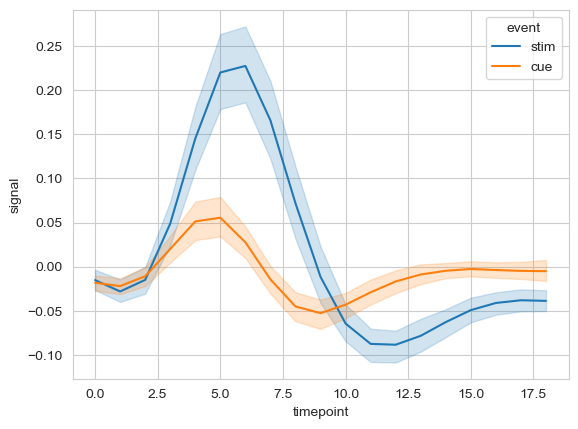

In [10]:
# 그냥 컬럼을 잡으면 됨, 선 색상을 변경하고 싶으면 palette='' 를 주면 된다는데 이미 바껴있긴 함.
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

## 회기 그래프(Regression plot)

In [11]:
# 회귀 그래프(regression plot) : 회귀식을 적용하여 선형회귀 추세선을 그래프에 함께 작성
# 선형회귀 추세선 : 데이터를 기반으로 데이터의 x값 대비 y값 변화를 예측하는 직선
# 함수 regplot 사용
# load_dataset()은 seaborn에 내장된 데이터셋을 불러오는 함수
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


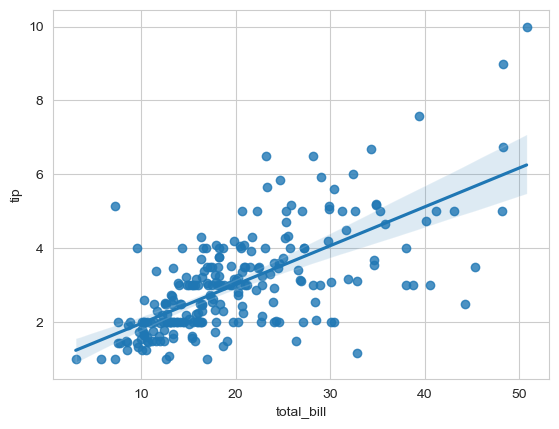

In [14]:
# 매개변수 x_ci는 신뢰구간의 비율을 나타냄
sns.regplot(x="total_bill", y="tip", data=tips, x_ci=95)
plt.show()

## 산점도(scatter plot)

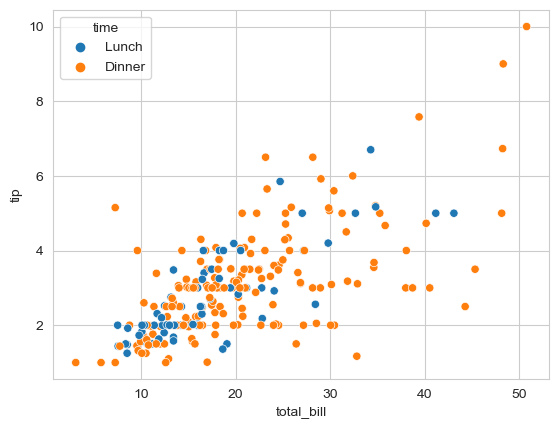

In [16]:
# 산점도(scatter plot) : x, y를 기준으로 데이터의 분포 표현
# 함수 scatterplot 사용
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)
plt.show()

## 비교 그래프(counter plot)

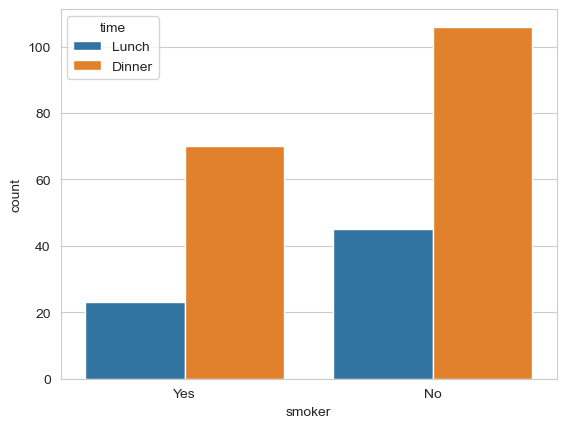

In [19]:
# 비교 그래프(counter plot) : 범주형 데이터의 항목별 개수
tips = sns.load_dataset("tips")
sns.countplot(x="smoker", hue="time", data=tips)
plt.show()

## 막대그래프(barplot)

In [21]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


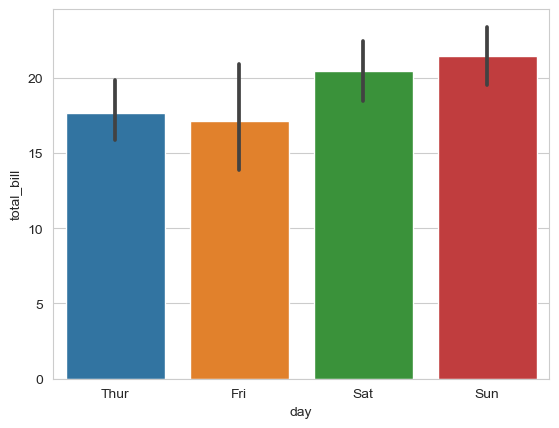

In [22]:
# 막대그래프
# y 값이 연속형 값일 경우 해당 값들의 평균을 나타냄
# 데이터의 신뢰구간을 검은색 막대로 표현
# 함수 barplot 사용
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

## 사전 정의된 그래프
맷플롯립 관점에서 여러 그래프들을 합쳐 정보를 추출
특히 범주형 데이터에 유용


### 분포를 나타내는 그래프 : 바이올린 플롯과 스웜 플롯

## 바이올린 플롯(violin plot)

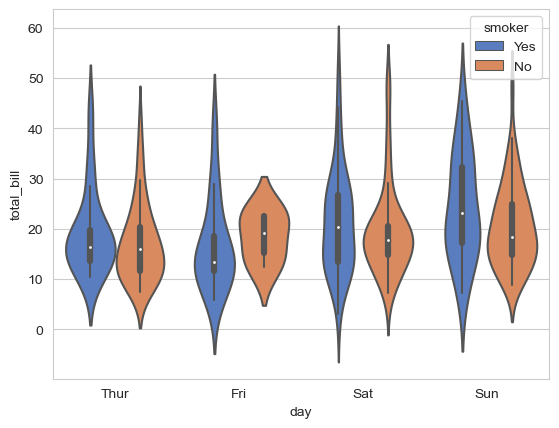

In [23]:
# 바이올린 플롯(violin plot) : 상자그림과 분포도를 한 번에 나타낼 수 있음
#                             x축에는 범주형 데이터, y축에는 연속형 데이터
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted")
plt.show()

## 스웜 플롯(swarm plot)

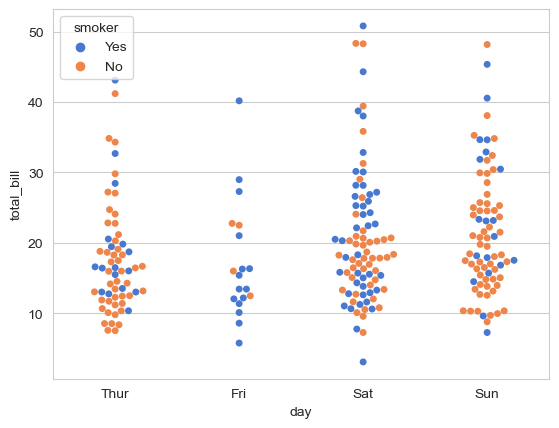

In [24]:
# 스웜 플롯(swarm plot) : 바이올린 플롯과 같은 형태에 산점도로 데이터 분포를 나타냄
#                         매개변수 hue로 두 개 이상의 범주형 데이터를 점이 겹치지 않게 정리 
#                         영역별 데이터 양을 직관적으로 보여줌
sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")
plt.show()

## 패싯그리드(FacetGrid) 

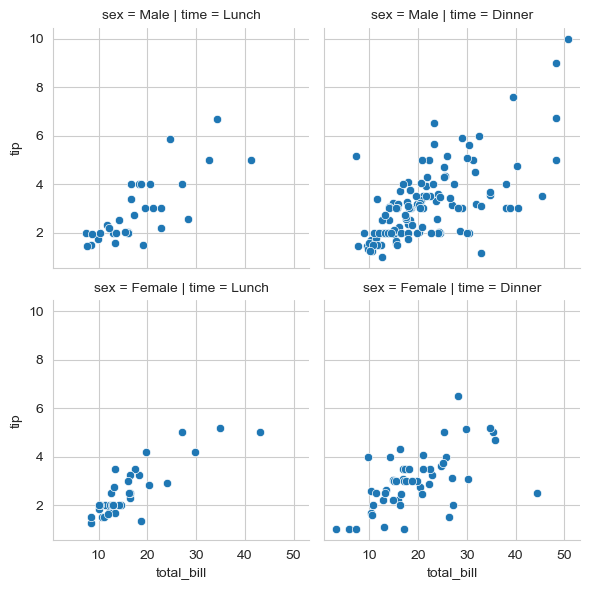

In [34]:
# 패싯그리드(FacetGrid) : 그래프의 틀만 제공하여 적당한 그래프를 그려주는 클래스
# 기본적인 데이터 표현 틀을 만듦
# 매개변수 col과 row에 범주형 데이터를 넣으면 데이터 종류만큼 ‘m×n’의 그래프 틀 생성
g = sns.FacetGrid(tips, col="time", 
                  row="sex")

# 그리드가 생성된 후 맵(map)을 사용하여 그래프 만듦
# 각 FacetGrid에 있는 개별 그래프 영역에 그래프를 집어넣는 구조
# 전체 데이터를 범주형 데이터의 다양한 관점에서 나눠서 볼 수 있음
g.map(sns.scatterplot, "total_bill", "tip")

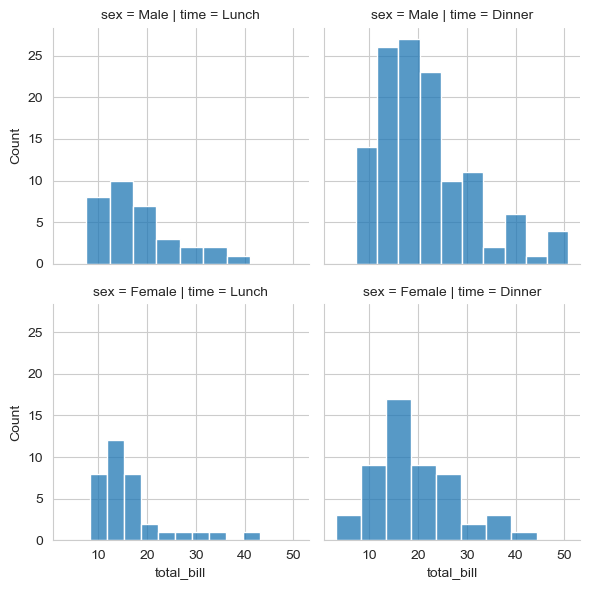

In [45]:
# 왜 인지 모르겠는데 같은 셀에 해야 나옴
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

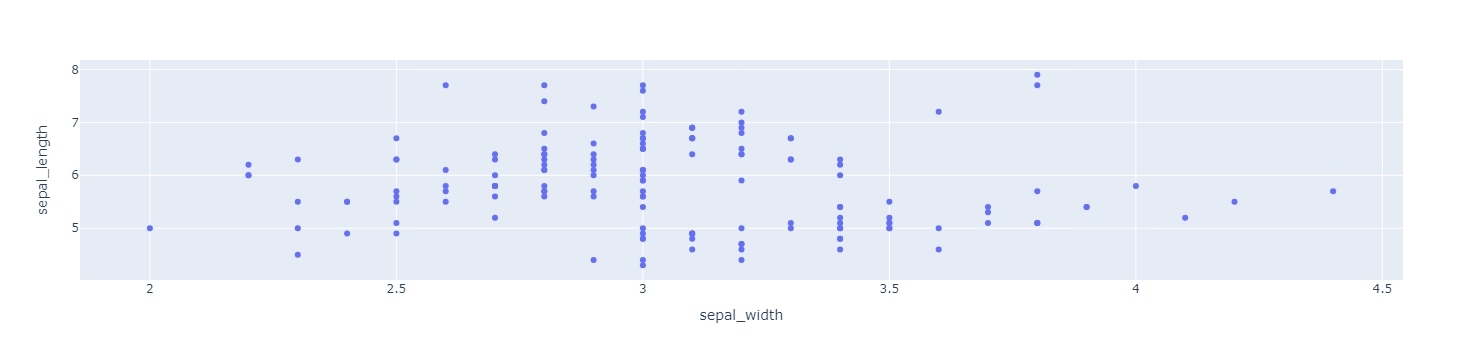